In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Geração de dados para uma função composta (exemplo: sin(x^2))
def funcao_composta(x):
    return np.sin(x**2)

def derivada_funcao_composta(x):
    return 2 * x * np.cos(x**2)

num_amostras = 2000
pontos_x = np.random.uniform(-3, 3, num_amostras)
valores_y = funcao_composta(pontos_x)
derivadas_y = derivada_funcao_composta(pontos_x)


In [20]:
# Normalização (importante para o treinamento)
mean_x = np.mean(pontos_x)
std_x = np.std(pontos_x)
pontos_x_norm = (pontos_x - mean_x) / std_x

mean_y = np.mean(derivadas_y)
std_y = np.std(derivadas_y)
derivadas_y_norm = (derivadas_y - mean_y) / std_y

X_train = torch.tensor(pontos_x_norm.reshape(-1, 1), dtype=torch.float32)
y_train = torch.tensor(derivadas_y_norm.reshape(-1, 1), dtype=torch.float32)

In [21]:
# Rede Neural (simples para tentar aprender a relação local)
class DerivadaNetGeral(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(DerivadaNetGeral, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out


In [22]:
# Hiperparâmetros
input_size = 1
hidden_size1 = 64
hidden_size2 = 128
output_size = 1
learning_rate = 0.001
num_epochs = 5000

In [23]:
# Inicializar a rede
model_geral = DerivadaNetGeral(input_size, hidden_size1, hidden_size2, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model_geral.parameters(), lr=learning_rate)

In [24]:
# Treinamento
historico_perdas_geral = []
for epoch in range(num_epochs):
    outputs = model_geral(X_train)
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    historico_perdas_geral.append(loss.item())

    #if (epoch + 1) % 1000 == 0:
    #    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print("Treinamento concluído!")

Treinamento concluído!


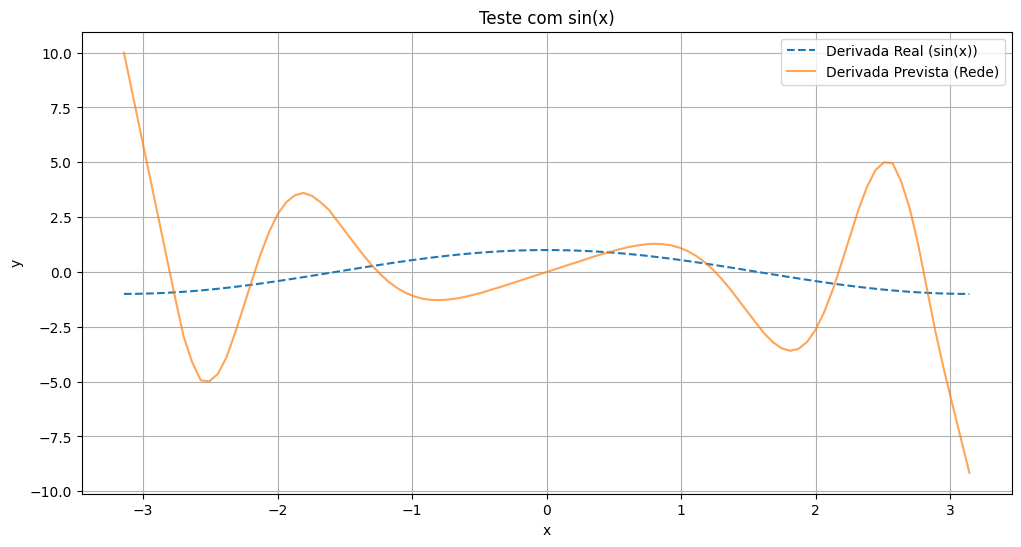

In [25]:
# Teste com outra função (ex: sin(x))
pontos_teste = np.linspace(-np.pi, np.pi, 100).reshape(-1, 1)
pontos_teste_norm = (pontos_teste - mean_x) / std_x
X_test = torch.tensor(pontos_teste_norm, dtype=torch.float32)

model_geral.eval()
with torch.no_grad():
    derivada_prevista_norm = model_geral(X_test)
    derivada_prevista = derivada_prevista_norm * std_y + mean_y
    derivada_real_sin = np.cos(pontos_teste)

plt.figure(figsize=(12, 6))
plt.plot(pontos_teste, derivada_real_sin, label='Derivada Real (sin(x))', linestyle='--')
plt.plot(pontos_teste, derivada_prevista, label='Derivada Prevista (Rede)', alpha=0.7)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Teste com sin(x)')
plt.grid(True)
plt.legend()
plt.show()

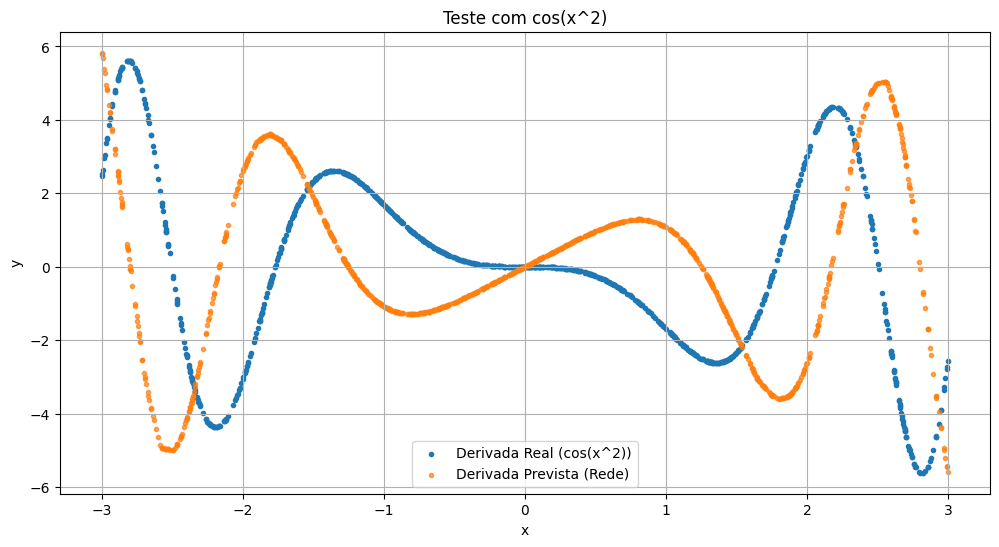

In [26]:
# Teste com outra função composta (ex: cos(x^2))
def funcao_composta_cos(x):
    return np.cos(x**2)

def derivada_funcao_composta_cos(x):
    return -2 * x * np.sin(x**2)

num_amostras_teste_cos = 1000
pontos_teste_cos = np.random.uniform(-3, 3, num_amostras_teste_cos).reshape(-1, 1)
pontos_teste_cos_norm = (pontos_teste_cos - mean_x) / std_x
X_test_cos = torch.tensor(pontos_teste_cos_norm, dtype=torch.float32)

model_geral.eval()
with torch.no_grad():
    derivada_prevista_cos_norm = model_geral(X_test_cos)
    derivada_prevista_cos = derivada_prevista_cos_norm * std_y + mean_y
    derivada_real_cos_amostras = derivada_funcao_composta_cos(pontos_teste_cos)

plt.figure(figsize=(12, 6))
plt.scatter(pontos_teste_cos, derivada_real_cos_amostras, label='Derivada Real (cos(x^2))', marker='.')
plt.scatter(pontos_teste_cos, derivada_prevista_cos, label='Derivada Prevista (Rede)', alpha=0.7, marker='.')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Teste com cos(x^2)')
plt.grid(True)
plt.legend()
plt.show()